In [ ]:
# !pip install easyocr

In [ ]:
import easyocr
import cv2
import ktrain
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
reader = easyocr.Reader(["en"], gpu=False)

Using CPU. Note: This module is much faster with a GPU.


In [ ]:
img_model_loaded = ktrain.load_predictor('models/image_model/')
text_model_loaded = ktrain.load_predictor('models/text_model/')

/Users/chandrareddy/miniforge3/lib/python3.10/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
class_names = ["hate_full","non_hate_full"]
def _get_classification(img_path):
    img = cv2.imread(img_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
    plt.axis('off')  # Turn off axis labels
    img_predictions = img_model_loaded.predict_proba_filename(img_path)
    img_confidence = max(img_predictions[0])
    img_class = class_names[np.argmax(img_predictions[0])]
    result = reader.readtext(img, detail=0)
    text = " ".join([k for k in result])
    print(f'ExtractedText:{text}')
    predictions = text_model_loaded.predict_proba(text)
    confidence = max(predictions)
    class_ = class_names[np.argmax(predictions)]
    if confidence*100 > 80:
        print(f'given meme is:{class_}:with confidence{round(confidence,3)}')
    else:
        print(f'given meme is:{img_class}:with confidence{round(img_confidence,3)}')
    plt.show()

ExtractedText:MC obama it is am [homor
given meme is:non_hate_full:with confidence0.5040000081062317


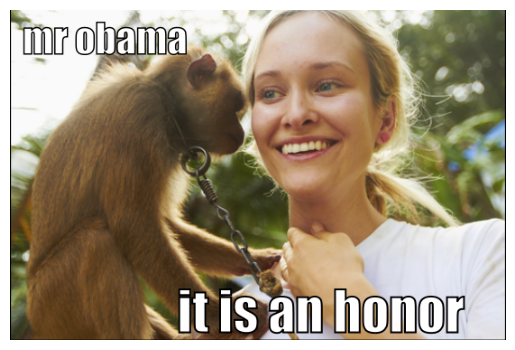

In [ ]:
_get_classification('final_data/random_testing/85679.png')